In [4]:
%pylab inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.markers import MarkerStyle
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


# Dynamics visualization
Plots of three different snaphsot of the population dynamics, with a single stored map, for one dimensional, two dimensional and three dimensional DCAs.

## 1D

In [41]:
pfc=load("1D/pfc.npy")
Vs=load("1D/Vdynamics.npy")

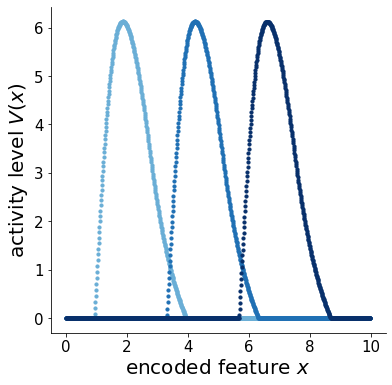

In [42]:
t=49
Dt=2

color=cm.Blues(np.linspace(0.5,1,3))
figure(figsize=(6,6))
scatter(pfc[0],Vs[t-Dt],label=r"$t_{1}$",color=color[0],s=10)
scatter(pfc[0],Vs[t],label=r"$t_{2}$",color=color[1],s=10)
scatter(pfc[0],Vs[t+Dt],label=r"$t_{3}$",color=color[2],s=10)
xlabel(r"encoded feature $x$", fontsize=20)
ylabel(r"activity level $V(x)$", fontsize=20)
plt.xticks(fontsize=15);
plt.yticks(fontsize=15);

sns.despine()
savefig("1D.svg")
#legend()

## 2D

In [49]:
pfc=load("2D/pfc.npy")
Vs=load("2D/Vdynamics.npy")

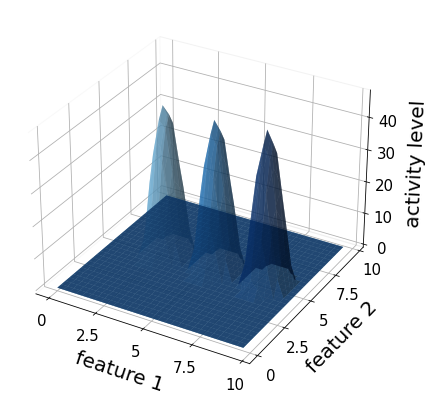

In [51]:
t=60
Dt=4

color=cm.Blues(np.linspace(0.5,1,3))

x = np.arange(0, 10, 10.0/30.0)
y = np.arange(0, 10, 10.0/30.0)
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

ax.xaxis.labelpad=10
ax.yaxis.labelpad=10
ax.zaxis.labelpad=10

ax.set_xlabel(r"feature 1", fontsize=20,linespacing=0.1)
ax.set_ylabel(r"feature 2", fontsize=20)
ax.set_zlabel("activity level",fontsize=20)
#ax.grid("off")
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.set_xticks([0,2.5,5,7.5,10]) 
ax.set_xticklabels([0,2.5,5,7.5,10], fontsize=15)  
ax.set_yticks([0,2.5,5,7.5,10]) 
ax.set_yticklabels([0,2.5,5,7.5,10], fontsize=15)  
ax.set_zticks([0,10,20,30,40]) 
ax.set_zticklabels([0,10,20,30,40], fontsize=15)  
#plt.zticks(fontsize=15);

Z = Vs[t-Dt].reshape((30,30))
ax.plot_surface(X, Y, Z,alpha=0.6,color=color[0],label=r"$t_{1}$")

Z = Vs[t].reshape((30,30))
ax.plot_surface(X, Y, Z,alpha=0.6,color=color[1],label=r"$t_{2}$")

Z = Vs[t+Dt].reshape((30,30))
ax.plot_surface(X, Y, Z,alpha=0.6,color=color[2],label=r"$t_{3}$")

#sns.despine()
#savefig("2D.svg")

## 3D

In [43]:
pfc=load("3D/pfc.npy")
Vs=load("3D/Vdynamics.npy")

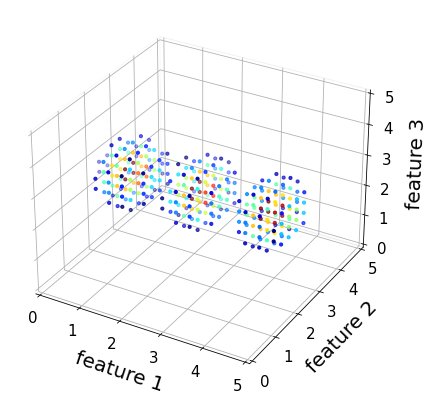

In [47]:
t=51
Dt=3

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False


ax.set_xlim3d(0,5)
ax.set_ylim3d(0,5)
ax.set_zlim3d(0,5)
    
    
ax.xaxis.labelpad=10
ax.yaxis.labelpad=10
ax.zaxis.labelpad=10

ax.set_xlabel(r"feature 1", fontsize=20)
ax.set_ylabel(r"feature 2", fontsize=20)
ax.set_zlabel("feature 3",fontsize=20)
    
ax.set_xticks([0,1,2,3,4,5]) 
ax.set_xticklabels([0,1,2,3,4,5], fontsize=15)  
ax.set_yticks([0,1,2,3,4,5]) 
ax.set_yticklabels([0,1,2,3,4,5], fontsize=15)  
ax.set_zticks([0,1,2,3,4,5]) 
ax.set_zticklabels([0,1,2,3,4,5], fontsize=15)      

V=[]
x=[]
y=[]
z=[]
for j in range(len(Vs[t-Dt])):
    if Vs[t-Dt][j]>0:
        V.append(Vs[t-Dt][j])
        x.append(pfc[0].T[0][j])
        y.append(pfc[0].T[1][j])
        z.append(pfc[0].T[2][j])
    
ax.scatter(x,y,z,c=V,cmap=cm.jet,s=10)

V=[]
x=[]
y=[]
z=[]
for j in range(len(Vs[t])):
    if Vs[t][j]>0:
        V.append(Vs[t][j])
        x.append(pfc[0].T[0][j])
        y.append(pfc[0].T[1][j])
        z.append(pfc[0].T[2][j])
    
ax.scatter(x,y,z,c=V,cmap=cm.jet,s=10)

V=[]
x=[]
y=[]
z=[]
for j in range(len(Vs[t+Dt])):
    if Vs[t+Dt][j]>0:
        V.append(Vs[t+Dt][j])
        x.append(pfc[0].T[0][j])
        y.append(pfc[0].T[1][j])
        z.append(pfc[0].T[2][j])
    
ax.scatter(x,y,z,c=V,cmap=cm.jet,s=10)

savefig("3D.svg")

# Video
The code below produces the frames necessary to make a video of the dynamic retrieval in 1D, 2D and 3D.